<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Flattening-JSONs" data-toc-modified-id="Flattening-JSONs-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Flattening JSONs</a></span></li><li><span><a href="#In-a-loop-on-real-data-now" data-toc-modified-id="In-a-loop-on-real-data-now-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>In a loop on real data now</a></span></li><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Autokeras--NAS" data-toc-modified-id="Autokeras--NAS-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Autokeras- NAS</a></span><ul class="toc-item"><li><span><a href="#With-ADAM-intead-of-RMSProp" data-toc-modified-id="With-ADAM-intead-of-RMSProp-0.5.1"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>With ADAM intead of RMSProp</a></span></li></ul></li></ul></li><li><span><a href="#Writing-a-flexible-hyperparameter-search-model" data-toc-modified-id="Writing-a-flexible-hyperparameter-search-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Writing a flexible hyperparameter search model</a></span></li><li><span><a href="#End-bookmark" data-toc-modified-id="End-bookmark-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>End bookmark</a></span></li></ul></div>

## Imports

In [3]:
import pandas as pd
import os
import glob
import numpy as np
import json
from IPython.display import clear_output

In [4]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1000-point-metrics_run_0_1608585427341.json',
 './tracelyzer\\1000-point-metrics_run_1_1608585434956.json',
 './tracelyzer\\1000-point-metrics_run_2_1608585438367.json',
 './tracelyzer\\1000-point-metrics_run_3_1608585444734.json',
 './tracelyzer\\1000-point-metrics_run_4_1608585451100.json',
 './tracelyzer\\1000-point-metrics_run_5_1608585454481.json',
 './tracelyzer\\1000-point-metrics_run_6_1608585457931.json',
 './tracelyzer\\1000-point-metrics_run_7_1608585461227.json',
 './tracelyzer\\1000-point-metrics_run_8_1608585464663.json',
 './tracelyzer\\1000-point-metrics_run_9_1608585468264.json',
 './tracelyzer\\1000-shape-metrics_run_0_1608610558467.json',
 './tracelyzer\\1000-shape-metrics_run_1_1608610561900.json',
 './tracelyzer\\1000-shape-metrics_run_2_1608610565933.json',
 './tracelyzer\\1000-shape-metrics_run_3_1608610569656.json',
 './tracelyzer\\1000-shape-metrics_run_4_1608610573438.json',
 './tracelyzer\\1000-shape-metrics_run_5_1608610577315.json',
 './trac

In [5]:
len(trace_files)

1579

In [6]:
jsondf = pd.DataFrame()

In [7]:
for file in trace_files:
    with open(file) as f:
        print(file)
        jsonstr = json.load(f)
        metrics = jsonstr['metrics']
        tempdf = pd.DataFrame(columns=['name','value'])
        for i in range(len(metrics)):
        #     print(metrics[i]['name'], metrics[i]['value'])
            tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
    

./tracelyzer\1000-point-metrics_run_0_1608585427341.json
./tracelyzer\1000-point-metrics_run_1_1608585434956.json
./tracelyzer\1000-point-metrics_run_2_1608585438367.json
./tracelyzer\1000-point-metrics_run_3_1608585444734.json
./tracelyzer\1000-point-metrics_run_4_1608585451100.json
./tracelyzer\1000-point-metrics_run_5_1608585454481.json
./tracelyzer\1000-point-metrics_run_6_1608585457931.json
./tracelyzer\1000-point-metrics_run_7_1608585461227.json
./tracelyzer\1000-point-metrics_run_8_1608585464663.json
./tracelyzer\1000-point-metrics_run_9_1608585468264.json
./tracelyzer\1000-shape-metrics_run_0_1608610558467.json
./tracelyzer\1000-shape-metrics_run_1_1608610561900.json
./tracelyzer\1000-shape-metrics_run_2_1608610565933.json
./tracelyzer\1000-shape-metrics_run_3_1608610569656.json
./tracelyzer\1000-shape-metrics_run_4_1608610573438.json
./tracelyzer\1000-shape-metrics_run_5_1608610577315.json
./tracelyzer\1000-shape-metrics_run_6_1608610581222.json
./tracelyzer\1000-shape-metrics

./tracelyzer\13000-point-metrics_run_3_1608598744543.json
./tracelyzer\13000-point-metrics_run_4_1608598642016.json
./tracelyzer\13000-point-metrics_run_4_1608598746424.json
./tracelyzer\13000-point-metrics_run_5_1608598748378.json
./tracelyzer\13000-point-metrics_run_6_1608598750266.json
./tracelyzer\13000-point-metrics_run_7_1608598752230.json
./tracelyzer\13000-point-metrics_run_8_1608598754375.json
./tracelyzer\13000-point-metrics_run_9_1608585773979.json
./tracelyzer\13000-point-metrics_run_9_1608598756184.json
./tracelyzer\13000-shape-metrics_run_0_1608609720391.json
./tracelyzer\13000-shape-metrics_run_1_1608609724165.json
./tracelyzer\13000-shape-metrics_run_2_1608600260756.json
./tracelyzer\13000-shape-metrics_run_2_1608609727841.json
./tracelyzer\13000-shape-metrics_run_3_1608609731610.json
./tracelyzer\13000-shape-metrics_run_4_1608609735730.json
./tracelyzer\13000-shape-metrics_run_5_1608609739582.json
./tracelyzer\13000-shape-metrics_run_6_1608609744045.json
./tracelyzer\1

./tracelyzer\15000-point-metrics_run_7_1608598701127.json
./tracelyzer\15000-point-metrics_run_8_1608598703038.json
./tracelyzer\15000-point-metrics_run_9_1608598705171.json
./tracelyzer\15000-shape-metrics_run_0_1608609599230.json
./tracelyzer\15000-shape-metrics_run_1_1608609005150.json
./tracelyzer\15000-shape-metrics_run_1_1608609603626.json
./tracelyzer\15000-shape-metrics_run_2_1608608937450.json
./tracelyzer\15000-shape-metrics_run_2_1608609609680.json
./tracelyzer\15000-shape-metrics_run_3_1608609613655.json
./tracelyzer\15000-shape-metrics_run_4_1608609617610.json
./tracelyzer\15000-shape-metrics_run_5_1608609621739.json
./tracelyzer\15000-shape-metrics_run_6_1608609626700.json
./tracelyzer\15000-shape-metrics_run_7_1608609631591.json
./tracelyzer\15000-shape-metrics_run_8_1608609635321.json
./tracelyzer\15000-shape-metrics_run_9_1608609639223.json
./tracelyzer\15000-state-metrics_run_0_1610576403890.json
./tracelyzer\15000-state-metrics_run_0_1610576410664.json
./tracelyzer\1

./tracelyzer\17000-shape-metrics_run_7_1608608826117.json
./tracelyzer\17000-shape-metrics_run_7_1608609409225.json
./tracelyzer\17000-shape-metrics_run_8_1608609413248.json
./tracelyzer\17000-shape-metrics_run_9_1608609417326.json
./tracelyzer\17000-state-metrics_run_1_1610576419929.json
./tracelyzer\17000-state-metrics_run_2_1610576422217.json
./tracelyzer\17037-state-metrics_run_6_1610470303909.json
./tracelyzer\17099-state-metrics_run_3_1610470667922.json
./tracelyzer\17099-state-metrics_run_6_1610470831367.json
./tracelyzer\17099-state-metrics_run_7_1610470787037.json
./tracelyzer\17470-state-metrics_run_1_1610471293945.json
./tracelyzer\17470-state-metrics_run_7_1610470486501.json
./tracelyzer\17470-state-metrics_run_9_1610470598783.json
./tracelyzer\17807-state-metrics_run_1_1610470559504.json
./tracelyzer\17807-state-metrics_run_3_1610470972327.json
./tracelyzer\17807-state-metrics_run_7_1610470388474.json
./tracelyzer\17807-state-metrics_run_8_1610470543395.json
./tracelyzer\1

./tracelyzer\2000-point-metrics_run_0_1608599085812.json
./tracelyzer\2000-point-metrics_run_1_1608599087281.json
./tracelyzer\2000-point-metrics_run_2_1608599088816.json
./tracelyzer\2000-point-metrics_run_3_1608599090287.json
./tracelyzer\2000-point-metrics_run_4_1608599091800.json
./tracelyzer\2000-point-metrics_run_5_1608599093209.json
./tracelyzer\2000-point-metrics_run_6_1608599094697.json
./tracelyzer\2000-point-metrics_run_7_1608599096237.json
./tracelyzer\2000-point-metrics_run_8_1608599097730.json
./tracelyzer\2000-point-metrics_run_9_1608599099324.json
./tracelyzer\2000-shape-metrics_run_0_1608610509566.json
./tracelyzer\2000-shape-metrics_run_2_1608610515879.json
./tracelyzer\2000-shape-metrics_run_3_1608610520028.json
./tracelyzer\2000-shape-metrics_run_5_1608610526403.json
./tracelyzer\2000-shape-metrics_run_6_1608610534195.json
./tracelyzer\2000-shape-metrics_run_7_1608610538692.json
./tracelyzer\2000-shape-metrics_run_8_1608610541969.json
./tracelyzer\2000-shape-metrics

./tracelyzer\22291-state-metrics_run_2_1610471976242.json
./tracelyzer\23000-point-metrics_run_0_1608598446255.json
./tracelyzer\23000-point-metrics_run_2_1608587599396.json
./tracelyzer\23000-point-metrics_run_2_1608589155830.json
./tracelyzer\23000-point-metrics_run_2_1608598450914.json
./tracelyzer\23000-point-metrics_run_3_1608587769901.json
./tracelyzer\23000-point-metrics_run_3_1608598453344.json
./tracelyzer\23000-point-metrics_run_4_1608596312903.json
./tracelyzer\23000-point-metrics_run_4_1608598455955.json
./tracelyzer\23000-point-metrics_run_5_1608598458699.json
./tracelyzer\23000-point-metrics_run_6_1608598461071.json
./tracelyzer\23000-point-metrics_run_7_1608597143414.json
./tracelyzer\23000-point-metrics_run_7_1608598274881.json
./tracelyzer\23000-point-metrics_run_7_1608598371210.json
./tracelyzer\23000-point-metrics_run_8_1608596362666.json
./tracelyzer\23000-point-metrics_run_8_1608598465516.json
./tracelyzer\23000-point-metrics_run_9_1608598467822.json
./tracelyzer\2

./tracelyzer\26000-shape-metrics_run_7_1608608616937.json
./tracelyzer\26000-shape-metrics_run_8_1608604887634.json
./tracelyzer\26000-shape-metrics_run_8_1608606543495.json
./tracelyzer\26000-shape-metrics_run_8_1608606794815.json
./tracelyzer\26000-shape-metrics_run_8_1608606915366.json
./tracelyzer\26000-shape-metrics_run_8_1608608635004.json
./tracelyzer\26000-shape-metrics_run_9_1608608655761.json
./tracelyzer\26336-state-metrics_run_0_1610471594110.json
./tracelyzer\26336-state-metrics_run_1_1610471600639.json
./tracelyzer\26336-state-metrics_run_2_1610471606863.json
./tracelyzer\2696-state-metrics_run_0_1610484214181.json
./tracelyzer\27000-point-metrics_run_0_1608598322726.json
./tracelyzer\27000-point-metrics_run_2_1608598327417.json
./tracelyzer\27000-point-metrics_run_3_1608598329978.json
./tracelyzer\27000-point-metrics_run_4_1608598332568.json
./tracelyzer\27000-point-metrics_run_5_1608598335114.json
./tracelyzer\27000-point-metrics_run_6_1608598337691.json
./tracelyzer\27

./tracelyzer\30000-point-metrics_run_1_1608589114122.json
./tracelyzer\30000-point-metrics_run_1_1608597424227.json
./tracelyzer\30000-point-metrics_run_6_1608597436674.json
./tracelyzer\30000-point-metrics_run_7_1608597439286.json
./tracelyzer\30000-point-metrics_run_8_1608597441878.json
./tracelyzer\30000-point-metrics_run_9_1608587627805.json
./tracelyzer\30000-point-metrics_run_9_1608597444541.json
./tracelyzer\30000-shape-metrics_run_0_1608599233851.json
./tracelyzer\30000-shape-metrics_run_0_1608608046437.json
./tracelyzer\30000-shape-metrics_run_1_1608606468257.json
./tracelyzer\30000-shape-metrics_run_3_1608607418316.json
./tracelyzer\30000-shape-metrics_run_3_1608608080480.json
./tracelyzer\30000-shape-metrics_run_4_1608605386919.json
./tracelyzer\30000-shape-metrics_run_5_1608608097536.json
./tracelyzer\30000-shape-metrics_run_6_1608608105586.json
./tracelyzer\30000-shape-metrics_run_8_1608604778323.json
./tracelyzer\30000-shape-metrics_run_8_1608608122041.json
./tracelyzer\3

./tracelyzer\3559-state-metrics_run_0_1610471100140.json
./tracelyzer\3559-state-metrics_run_1_1608611368162.json
./tracelyzer\3559-state-metrics_run_1_1610471103727.json
./tracelyzer\3559-state-metrics_run_2_1608611566832.json
./tracelyzer\3559-state-metrics_run_2_1608611820025.json
./tracelyzer\3559-state-metrics_run_2_1610471107407.json
./tracelyzer\3559-state-metrics_run_3_1608611374767.json
./tracelyzer\3559-state-metrics_run_3_1608611430220.json
./tracelyzer\3559-state-metrics_run_4_1608611492218.json
./tracelyzer\3559-state-metrics_run_5_1608611381866.json
./tracelyzer\3559-state-metrics_run_5_1608611437636.json
./tracelyzer\3559-state-metrics_run_6_1608611386051.json
./tracelyzer\3559-state-metrics_run_6_1608611500134.json
./tracelyzer\3559-state-metrics_run_7_1608611389677.json
./tracelyzer\3559-state-metrics_run_7_1608611445428.json
./tracelyzer\3559-state-metrics_run_8_1608611393244.json
./tracelyzer\3559-state-metrics_run_9_1608611397396.json
./tracelyzer\3559-state-metrics

./tracelyzer\41000-shape-metrics_run_0_1608606323679.json
./tracelyzer\41000-shape-metrics_run_1_1608606333804.json
./tracelyzer\41000-shape-metrics_run_4_1608606358352.json
./tracelyzer\41000-shape-metrics_run_5_1608606367533.json
./tracelyzer\41000-shape-metrics_run_6_1608606378712.json
./tracelyzer\41000-shape-metrics_run_7_1608606393237.json
./tracelyzer\41000-shape-metrics_run_8_1608606408637.json
./tracelyzer\41000-shape-metrics_run_9_1608606423312.json
./tracelyzer\42000-point-metrics_run_1_1608596208531.json
./tracelyzer\42000-point-metrics_run_2_1608596212885.json
./tracelyzer\42000-point-metrics_run_3_1608596217302.json
./tracelyzer\42000-point-metrics_run_4_1608596222340.json
./tracelyzer\42000-point-metrics_run_6_1608596228855.json
./tracelyzer\42000-point-metrics_run_8_1608596235017.json
./tracelyzer\42000-point-metrics_run_9_1608596238638.json
./tracelyzer\42000-shape-metrics_run_0_1608606207385.json
./tracelyzer\42000-shape-metrics_run_1_1608606214928.json
./tracelyzer\4

./tracelyzer\49000-point-metrics_run_9_1608585552912.json
./tracelyzer\49000-shape-metrics_run_0_1608599289385.json
./tracelyzer\49000-shape-metrics_run_3_1608599304697.json
./tracelyzer\49000-shape-metrics_run_4_1608599310916.json
./tracelyzer\49000-shape-metrics_run_5_1608599316559.json
./tracelyzer\49000-shape-metrics_run_6_1608599321946.json
./tracelyzer\49000-shape-metrics_run_8_1608599332290.json
./tracelyzer\4952-state-metrics_run_3_1608611717081.json
./tracelyzer\5000-point-metrics_run_0_1608599003359.json
./tracelyzer\5000-point-metrics_run_1_1608599005037.json
./tracelyzer\5000-point-metrics_run_2_1608599006595.json
./tracelyzer\5000-point-metrics_run_3_1608599008174.json
./tracelyzer\5000-point-metrics_run_4_1608599009738.json
./tracelyzer\5000-point-metrics_run_5_1608599011394.json
./tracelyzer\5000-point-metrics_run_6_1608599012979.json
./tracelyzer\5000-point-metrics_run_7_1608599014886.json
./tracelyzer\5000-point-metrics_run_8_1608599016777.json
./tracelyzer\5000-point-

In [8]:
# dataframe = pd.DataFrame.from_dict(a_json, orient="index")
testdf = pd.DataFrame.from_dict(jsonstr['metrics'][0],orient="index").T
testdf.append(pd.DataFrame.from_dict(jsonstr['metrics'][1],orient="index").T)

,name,value
0,Timestamp,595362
0,AudioHandlers,0


In [9]:
tempdf = pd.DataFrame(columns=['name','value'])
for i in range(len(metrics)):
#     print(metrics[i]['name'], metrics[i]['value'])
    tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
tempdf.T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,595362,0,6,2,197,117,0,0,338,36,...,0.003501,0.257449,0.106818,0.300931,0.6875,5.5749e+06,7.34822e+06,0,595362,595361


In [10]:
tempdf

,name,value
0,Timestamp,5.953624e+05
1,AudioHandlers,0.000000e+00
2,Documents,6.000000e+00
3,Frames,2.000000e+00
4,JSEventListeners,1.970000e+02
5,LayoutObjects,1.170000e+02
6,MediaKeySessions,0.000000e+00
7,MediaKeys,0.000000e+00
8,Nodes,3.380000e+02
9,Resources,3.600000e+01


In [11]:
for file in trace_files:
    with open(file) as f:
        jsonstr = json.load(f)
#         print(jsonstr)
        df = pd.DataFrame({'value': jsonstr})

In [12]:
df

,value
metrics,"[{'name': 'Timestamp', 'value': 595362.367658}..."
performanceTiming,"{""connectStart"":1608610117397,""navigationStart..."
profiling,{'categories': {'scripting': 101.1360000371933...
rendering,"{'firstPaint': 1.465458, 'forcedReflowEvents':..."


In [13]:
# for file in trace_files:
#     with open(file,'r') as f:
#         lines = f.read()
#         runs = lines.split("--------------------")
#         for run in runs:
#             if len(run) > 1:
#                 submetrics = run.split('\n')
#                 jsons = []
#                 for m in submetrics:
#                     if m != '':
#                         if json.loads(m):
#                             metric = json.loads(m)
#                             jsons.append(metric)
#                             with pd.read_json(metric) as tempdf:
#                                 print(tempdf)
                            
#                 jsons[0].update(jsons[1])
#                 with open(f'{file}-merged.json','a') as fw:
#                     json.dump(jsons[0],fw)
#                     print(json.dumps(jsons[0]))
#             clear_output(wait=False)

In [14]:
# len(run)

## Flattening JSONs

In [15]:
import json 
import pandas as pd 
from pandas import json_normalize #package for flattening json in pandas df

In [16]:
# Source : Kaggle

#load json object
with open(trace_files[0]) as f:
    d = json.load(f)

#lets put the data into a pandas df
#clicking on raw_nyc_phil.json under "Input Files"
#tells us parent node is 'programs'
nycphil = json_normalize(d['profiling']['categories'])
nycphil.head(3)

,scripting,rendering,loading,painting
0,113.008,93.058,24.101,5.983


In [17]:
nycphil1 = json_normalize(d['profiling']['events'])
nycphil1.head(3)

,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,Compile Script,Minor GC,Update Layer Tree,Parse Stylesheet,Composite Layers,Evaluate Script,Hit Test,XHR Ready State Change
0,95.256999,81.076,22.023,9.582,9.031,5.326,4.298,3.982,2.147,2.078,0.657,0.429,0.253,0.011


In [18]:
nycphil2 = json_normalize(d['rendering'])
nycphil2.head(3)

,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,None,5,38.86,906666.71,952.19,24.03,4694.84


In [19]:
nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
nycphil3 = nycphil3.set_index('name')
# nycphil3 = nycphil3.rename(columns={"value": "0"})
nycphil3 = nycphil3.T
nycphil3.head(3)

name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,570669.563992,0.0,6.0,2.0,173.0,117.0,0.0,0.0,330.0,28.0,...,0.004325,1.341042,1.139688,0.375995,0.890625,5412548.0,7348224.0,0.0,570669.421832,570668.765104


In [20]:
nycphil4 = d['performanceTiming']
nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
nycphil4 = nycphil4.T
nycphil4.head(3)

,connectEnd,connectStart,domComplete,domContentLoadedEventEnd,domContentLoadedEventStart,domInteractive,domLoading,domainLookupEnd,domainLookupStart,fetchStart,...,loadEventStart,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart
value,1608585424647,1608585424646,1608585425130,1608585424998,1608585424997,1608585424997,1608585424661,1608585424345,1608585424345,1608585424341,...,1608585425130,1608585424340,0,0,1608585424647,1608585424648,1608585424648,0,0,0


In [21]:
nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape, nycphil4.shape

((1, 4), (1, 14), (1, 7), (1, 35), (1, 21))

In [22]:
for col in nycphil1:
    nycphil[col] = nycphil1[col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,Compile Script,Minor GC,Update Layer Tree,Parse Stylesheet,Composite Layers,Evaluate Script,Hit Test,XHR Ready State Change
0,113.008,93.058,24.101,5.983,95.256999,81.076,22.023,9.582,9.031,5.326,4.298,3.982,2.147,2.078,0.657,0.429,0.253,0.011


In [23]:
for col in nycphil2:
    nycphil[col] = nycphil2[col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,...,Evaluate Script,Hit Test,XHR Ready State Change,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,113.008,93.058,24.101,5.983,95.256999,81.076,22.023,9.582,9.031,5.326,...,0.429,0.253,0.011,None,5,38.86,906666.71,952.19,24.03,4694.84


In [24]:
for col in nycphil3:
#     print(nycphil3[col])
    nycphil[col] = nycphil3.iloc[0][col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
0,113.008,93.058,24.101,5.983,95.256999,81.076,22.023,9.582,9.031,5.326,...,0.004325,1.341042,1.139688,0.375995,0.890625,5412548.0,7348224.0,0.0,570669.421832,570668.765104


In [25]:
for col in nycphil4:
#     print(nycphil4[col])
    nycphil[col] = nycphil4.iloc[0][col]
nycphil

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,...,loadEventStart,navigationStart,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart
0,113.008,93.058,24.101,5.983,95.256999,81.076,22.023,9.582,9.031,5.326,...,1608585425130,1608585424340,0,0,1608585424647,1608585424648,1608585424648,0,0,0


In [26]:
# perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
# nycphil4 = {
#         key:d[key] for key in perfkeys
#            }
# nycphil4 = pd.DataFrame(nycphil4,index={'value'})
# nycphil4.head()
# perfkeys

In [27]:
nycphil.shape

(1, 81)

In [28]:
# int(trace_file.split('\\')[1].split('-')[0])

In [29]:
# tempdf = mydf.copy()
# for i in range(tempdf.count()[0]):
#     tempdf[int(trace_file.split('\\')[1].split('-')[0])] = tempdf.iloc[i]
# #     print(tempdf.iloc[i])

## In a loop on real data now

In [30]:
import json 
import pandas as pd 
import glob
import datetime
from pandas import json_normalize #package for flattening json in pandas df
from tqdm import trange, tqdm

In [31]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1000-point-metrics_run_0_1608585427341.json',
 './tracelyzer\\1000-point-metrics_run_1_1608585434956.json',
 './tracelyzer\\1000-point-metrics_run_2_1608585438367.json',
 './tracelyzer\\1000-point-metrics_run_3_1608585444734.json',
 './tracelyzer\\1000-point-metrics_run_4_1608585451100.json',
 './tracelyzer\\1000-point-metrics_run_5_1608585454481.json',
 './tracelyzer\\1000-point-metrics_run_6_1608585457931.json',
 './tracelyzer\\1000-point-metrics_run_7_1608585461227.json',
 './tracelyzer\\1000-point-metrics_run_8_1608585464663.json',
 './tracelyzer\\1000-point-metrics_run_9_1608585468264.json',
 './tracelyzer\\1000-shape-metrics_run_0_1608610558467.json',
 './tracelyzer\\1000-shape-metrics_run_1_1608610561900.json',
 './tracelyzer\\1000-shape-metrics_run_2_1608610565933.json',
 './tracelyzer\\1000-shape-metrics_run_3_1608610569656.json',
 './tracelyzer\\1000-shape-metrics_run_4_1608610573438.json',
 './tracelyzer\\1000-shape-metrics_run_5_1608610577315.json',
 './trac

In [32]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((150, 1),
        value
 1000      20
 1180      16
 1347      38
 1526       1
 2000      18
 ...      ...
 45000     18
 46000     12
 47000     12
 48000     16
 49000     15
 
 [150 rows x 1 columns])

In [33]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

In [34]:
mydf

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,...,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart,Animation Frame Fired,Image Decode,XHR Load,Major GC,fps,Fire Idle Callback
0,113.008000,93.058,24.101000,5.983000,95.256999,81.076,22.023000,9.582,9.031,5.326,...,1608585424648,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
0,163.756999,83.199,24.709000,10.721000,133.487000,62.112,22.531000,14.405,14.574,5.044,...,1608585428697,0,0,0,2.380999,0.058,NaN,NaN,NaN,NaN
0,119.120000,61.772,18.341000,7.526999,101.358999,41.275,16.671001,14.122,8.241,3.652,...,1608585436322,0,0,0,2.966000,0.066,NaN,NaN,NaN,NaN
0,106.325000,50.659,16.904000,7.085000,89.634000,36.099,15.776000,9.974,6.505,4.070,...,1608585441768,0,0,0,2.802000,0.090,NaN,NaN,NaN,NaN
0,127.197000,58.582,19.088000,8.262000,108.212000,38.772,17.612000,13.989,7.831,4.247,...,1608585448156,0,0,0,2.725000,0.119,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,97.850000,47.023,17.922000,5.325000,81.806000,33.479,16.399000,9.005,7.495,3.090,...,1608610102082,0,0,0,2.243000,0.036,NaN,NaN,NaN,NaN
0,110.877999,56.676,19.012000,9.951999,92.348999,32.681,17.127000,15.393,6.261,4.127,...,1608610105721,0,0,0,4.444000,NaN,NaN,NaN,NaN,NaN
0,105.055001,57.921,19.653000,9.035000,88.583001,37.457,17.563000,13.640,6.340,3.803,...,1608610110036,0,0,0,3.939000,0.037,NaN,NaN,NaN,NaN
0,109.488000,52.567,21.184000,7.227000,93.965000,34.075,19.879000,10.411,6.455,3.382,...,1608610113578,0,0,0,3.068000,0.105,NaN,NaN,NaN,NaN


In [35]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [36]:
mydf.to_csv('metric-dataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [37]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

'26Jan2021-1239AM'

## Correlation of Columns

In [38]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Layout
☐Parse HTML
☐Recalculate Style
☐Run Microtasks
☐Paint
☐Compile Script
☐Minor GC
☐Update Layer Tree
☐Parse Stylesheet
☐Composite Layers
☐Evaluate Script
☐Hit Test
☐XHR Ready State Change
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart
☐connectEnd
☐connectStart
☐domComplete
☐domContentLoadedEventEnd
☐domContentLoadedEventStart


In [39]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,330.0,5412548.0,7348224.0,113.008000,93.058,5.983000,24.101000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688
0,330.0,5450604.0,7348224.0,163.756999,83.199,10.721000,24.709000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864
0,330.0,5477748.0,7348224.0,119.120000,61.772,7.526999,18.341000,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836
0,330.0,5442708.0,7348224.0,106.325000,50.659,7.085000,16.904000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025
0,330.0,5443360.0,7348224.0,127.197000,58.582,8.262000,19.088000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,7348224.0,97.850000,47.023,5.325000,17.922000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.014832,0.088454,0.003268,0.109034
0,338.0,5876352.0,7348224.0,110.877999,56.676,9.951999,19.012000,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.013332,0.097353,0.003128,0.128425
0,338.0,5571636.0,7348224.0,105.055001,57.921,9.035000,19.653000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.014577,0.095612,0.003176,0.120235
0,338.0,5573408.0,7348224.0,109.488000,52.567,7.227000,21.184000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.018238,0.100385,0.003084,0.118562


In [40]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058,5.983000,24.101000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199,10.721000,24.709000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772,7.526999,18.341000,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659,7.085000,16.904000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582,8.262000,19.088000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,97.850000,47.023,5.325000,17.922000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.014832,0.088454,0.003268,0.109034,0.756720
0,338.0,5876352.0,110.877999,56.676,9.951999,19.012000,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.013332,0.097353,0.003128,0.128425,0.799697
0,338.0,5571636.0,105.055001,57.921,9.035000,19.653000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.014577,0.095612,0.003176,0.120235,0.758229
0,338.0,5573408.0,109.488000,52.567,7.227000,21.184000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.018238,0.100385,0.003084,0.118562,0.758470


In [41]:
corrdf.corr()

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.899567,0.908934,0.812347,0.814966,-0.162639,0.888339,0.919784,0.851085,0.172120,0.162322,0.961366,-0.082676,0.933196,-0.120964,0.479094,0.433544
JSHeapUsedSize,0.899567,1.000000,0.925379,0.642990,0.632553,-0.179704,0.869172,0.929193,0.871494,0.156294,0.079440,0.812422,-0.115033,0.953638,-0.128618,0.408753,0.493556
scripting,0.908934,0.925379,1.000000,0.835223,0.786417,0.014014,0.955576,0.979128,0.924486,0.209136,0.314065,0.895996,0.085476,0.983788,0.055309,0.553695,0.407776
rendering,0.812347,0.642990,0.835223,1.000000,0.946006,0.307160,0.886964,0.844615,0.796965,0.318723,0.643278,0.913659,0.344131,0.806130,0.308920,0.687761,0.187350
painting,0.814966,0.632553,0.786417,0.946006,1.000000,0.208822,0.842155,0.809521,0.768417,0.439112,0.486939,0.917466,0.260167,0.774407,0.198212,0.646642,0.158344
loading,-0.162639,-0.179704,0.014014,0.307160,0.208822,1.000000,0.165088,0.052673,0.067717,0.230479,0.760486,0.005729,0.755050,-0.029520,0.808895,0.444695,-0.317949
TaskDuration,0.888339,0.869172,0.955576,0.886964,0.842155,0.165088,1.000000,0.974504,0.921133,0.287612,0.451239,0.915290,0.236272,0.960597,0.179436,0.740914,0.315516
ThreadTime,0.919784,0.929193,0.979128,0.844615,0.809521,0.052673,0.974504,1.000000,0.955263,0.270552,0.345800,0.917590,0.126600,0.988687,0.079087,0.593734,0.382365
ProcessTime,0.851085,0.871494,0.924486,0.796965,0.768417,0.067717,0.921133,0.955263,1.000000,0.329597,0.337650,0.856735,0.143840,0.930669,0.089652,0.568494,0.338494
RecalcStyleCount,0.172120,0.156294,0.209136,0.318723,0.439112,0.230479,0.287612,0.270552,0.329597,1.000000,0.178047,0.289575,0.191158,0.214077,0.127845,0.355558,-0.249277


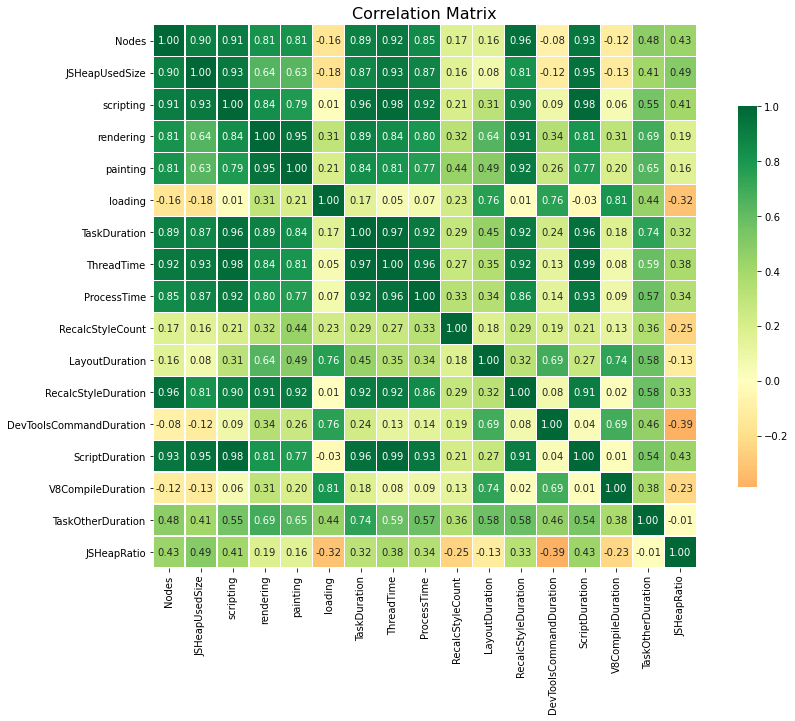

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
correlation_heatmap(corrdf) 

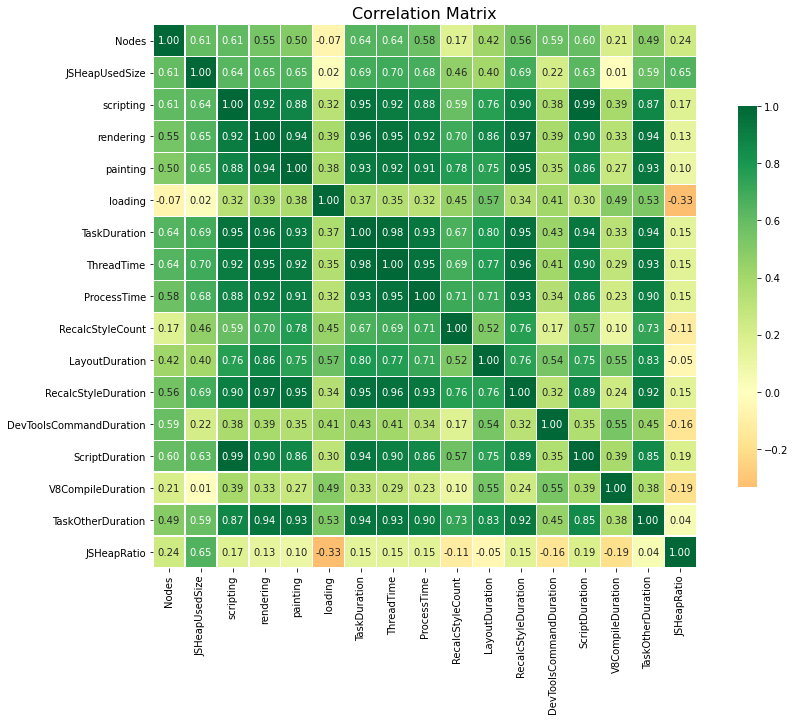

In [43]:
correlation_heatmap(corrdf,'spearman')

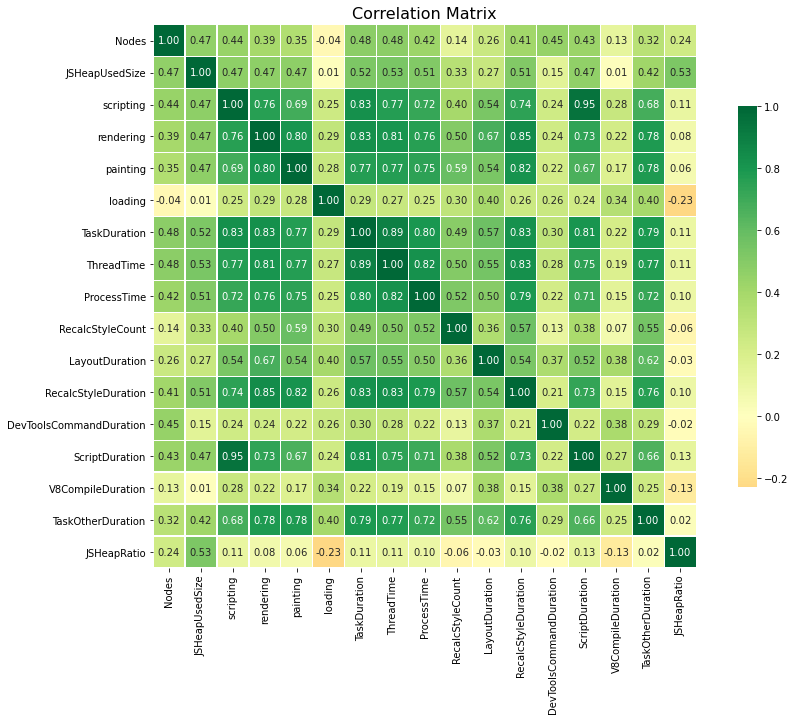

In [44]:
correlation_heatmap(corrdf,'kendall')

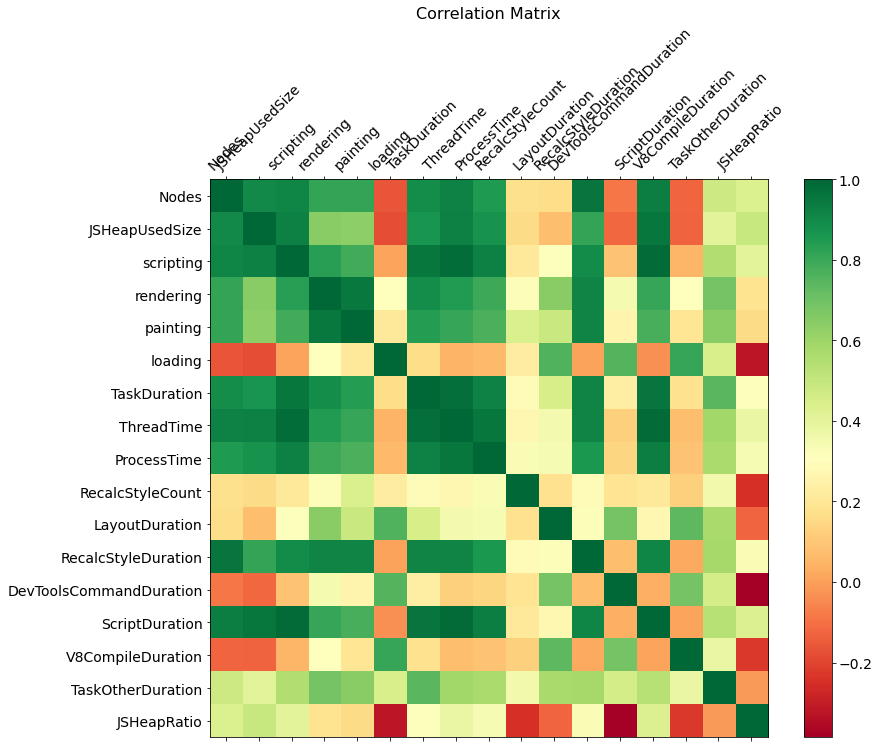

In [45]:
# cmap = ListedColormap(['r','g'])
f = plt.figure(figsize=(13, 10))
plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [46]:
corrdf.corr('spearman')

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.606694,0.613449,0.552568,0.504745,-0.068728,0.644225,0.643919,0.575508,0.165375,0.421161,0.560012,0.587857,0.595219,0.206644,0.494179,0.243997
JSHeapUsedSize,0.606694,1.000000,0.637652,0.646708,0.647459,0.018328,0.690557,0.702502,0.678909,0.464052,0.399350,0.688593,0.219032,0.629173,0.014641,0.590877,0.650005
scripting,0.613449,0.637652,1.000000,0.917385,0.876050,0.319089,0.952901,0.917537,0.878177,0.585015,0.761147,0.904794,0.379192,0.994281,0.393087,0.871167,0.172897
rendering,0.552568,0.646708,0.917385,1.000000,0.944073,0.389597,0.959474,0.952067,0.915631,0.696587,0.861771,0.966887,0.386287,0.901727,0.333884,0.937802,0.128818
painting,0.504745,0.647459,0.876050,0.944073,1.000000,0.378779,0.926079,0.924556,0.909695,0.781349,0.750978,0.951215,0.346100,0.860614,0.270129,0.931887,0.099665
loading,-0.068728,0.018328,0.319089,0.389597,0.378779,1.000000,0.369785,0.348308,0.324009,0.446934,0.571663,0.339443,0.412148,0.304767,0.493220,0.531813,-0.330755
TaskDuration,0.644225,0.690557,0.952901,0.959474,0.926079,0.369785,1.000000,0.976223,0.930830,0.671073,0.795175,0.954667,0.431952,0.936091,0.325365,0.939507,0.147197
ThreadTime,0.643919,0.702502,0.917537,0.952067,0.924556,0.348308,0.976223,1.000000,0.954737,0.688283,0.772974,0.955795,0.409614,0.898401,0.288476,0.927786,0.149707
ProcessTime,0.575508,0.678909,0.878177,0.915631,0.909695,0.324009,0.930830,0.954737,1.000000,0.706500,0.710293,0.932657,0.338190,0.863991,0.234454,0.896243,0.148101
RecalcStyleCount,0.165375,0.464052,0.585015,0.696587,0.781349,0.446934,0.671073,0.688283,0.706500,1.000000,0.517455,0.762865,0.171299,0.567223,0.103876,0.732480,-0.114133


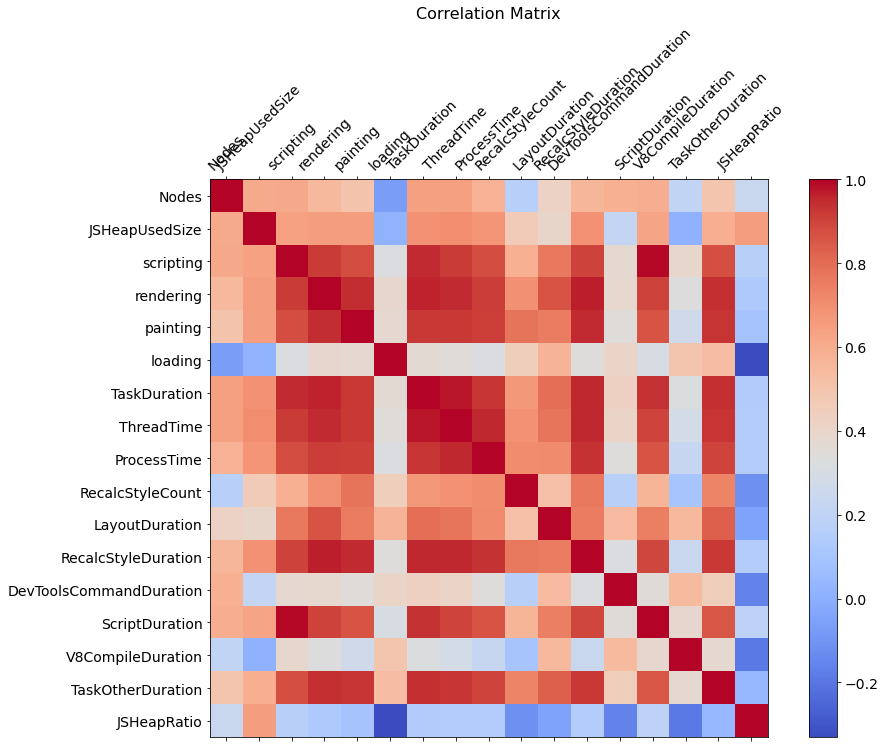

In [47]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Autokeras- NAS

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import autokeras as ak

In [49]:
model_data = corrdf.drop(columns=['loading'])#['loading','Documents','Resources','DevToolsCommandDuration','V8CompileDuration']
model_data

,Nodes,JSHeapUsedSize,scripting,rendering,painting,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058,5.983000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199,10.721000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772,7.526999,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659,7.085000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582,8.262000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,97.850000,47.023,5.325000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.014832,0.088454,0.003268,0.109034,0.756720
0,338.0,5876352.0,110.877999,56.676,9.951999,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.013332,0.097353,0.003128,0.128425,0.799697
0,338.0,5571636.0,105.055001,57.921,9.035000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.014577,0.095612,0.003176,0.120235,0.758229
0,338.0,5573408.0,109.488000,52.567,7.227000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.018238,0.100385,0.003084,0.118562,0.758470


In [50]:
# from sklearn.model_selection import train_test_split

train_dataset = model_data.iloc[:400]
test_dataset = model_data.iloc[400:]

# X_train, X_test, y_train, y_test = train_test_split(model_data,labels,test_size = 0.5, random_state = 42)

In [51]:
len(train_dataset),len(test_dataset)

(400, 1179)

In [52]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,400.0,1.522273e+03,1.640267e+03,3.300000e+02,3.397500e+02,3.440000e+02,3.264500e+03,1.047000e+04
JSHeapUsedSize,400.0,2.761476e+07,2.971241e+07,5.178828e+06,5.412839e+06,5.655704e+06,5.348100e+07,1.236279e+08
scripting,400.0,3.982131e+02,3.787463e+02,9.161500e+01,1.046752e+02,1.240525e+02,8.031413e+02,1.492193e+03
rendering,400.0,7.789462e+01,3.908833e+01,3.721400e+01,4.716525e+01,5.813250e+01,1.157835e+02,2.461760e+02
painting,400.0,1.070500e+01,5.730157e+00,1.013000e+00,5.602250e+00,9.606000e+00,1.522650e+01,4.301900e+01
TaskDuration,400.0,6.190840e-01,4.543258e-01,2.110390e-01,2.644905e-01,3.064095e-01,1.127828e+00,1.918330e+00
ThreadTime,400.0,6.120679e-01,3.937263e-01,2.423930e-01,3.004850e-01,3.545895e-01,1.057417e+00,1.731875e+00
ProcessTime,400.0,1.937891e+00,1.317653e+00,5.156250e-01,7.812500e-01,1.125000e+00,3.328125e+00,6.937500e+00
RecalcStyleCount,400.0,2.538250e+01,1.460906e+01,6.000000e+00,1.500000e+01,2.450000e+01,2.900000e+01,1.210000e+02
LayoutDuration,400.0,3.647957e-02,6.573296e-03,2.916400e-02,3.215100e-02,3.502850e-02,3.866650e-02,8.091300e-02


In [53]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [54]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [55]:
normed_train_data.head()

,DevToolsCommandDuration,JSHeapRatio,JSHeapUsedSize,LayoutDuration,ProcessTime,RecalcStyleCount,RecalcStyleDuration,ScriptDuration,TaskDuration,TaskOtherDuration,ThreadTime,V8CompileDuration,painting,rendering,scripting
0,-1.128035,-0.096858,-0.747237,6.759687,-0.794796,-1.326745,-0.840004,-0.759875,1.589075,12.852820,-0.599586,1.150974,-0.824061,0.387926,-0.753024
0,-0.797739,-0.030859,-0.745956,3.914083,1.422688,-0.779140,-0.648448,-0.640332,-0.460894,0.288822,-0.401179,5.329887,0.002792,0.135703,-0.619032
0,-0.892403,0.016215,-0.745042,0.743984,-0.948953,-0.163084,-0.651671,-0.740875,-0.695851,-0.295115,-0.688943,0.019121,-0.554610,-0.412466,-0.736887
0,-1.044574,-0.044553,-0.746222,-0.032643,-0.664356,-0.436886,-0.773854,-0.772870,-0.769058,-0.435315,-0.681450,0.153278,-0.631745,-0.696771,-0.770669
0,-0.835959,-0.043422,-0.746200,0.393475,-0.652498,-0.710689,-0.741338,-0.727504,-0.690533,-0.283029,-0.660674,1.582744,-0.426341,-0.494076,-0.715561


In [57]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [58]:
model = reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [63]:
train_dataset.shape, test_dataset.shape, train_labels.shape

((400, 15), (1179, 15), (400,))

In [64]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

InternalError: GPU sync failed

In [372]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

37/37 - 0s - loss: 105686.7969 - mae: 128.8727 - mse: 105686.7969
Testing set Mean Abs Error: 128.87 Nodes


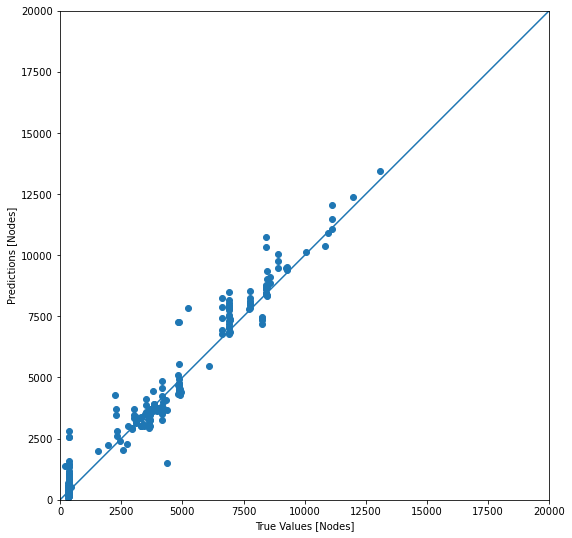

In [373]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 20000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [374]:
test_labels

0     345.0
0    2469.0
0    3944.0
0    3850.0
0    4853.0
      ...  
0     338.0
0     338.0
0     338.0
0     338.0
0     338.0
Name: Nodes, Length: 1179, dtype: float64

In [375]:
test_predictions

array([ 329.2659 , 2406.7512 , 3612.561  , ...,  332.114  ,  324.76984,
        335.69855], dtype=float32)

### With ADAM intead of RMSProp

In [376]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_adam_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [377]:
model = reg_adam_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [378]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

Epoch 1/1000
10/10 [==============================] - 0s 13ms/step - loss: 3382744.5000 - mae: 1176.9612 - mse: 3382744.5000 - val_loss: 11335596.0000 - val_mae: 2876.2964 - val_mse: 11335596.0000
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 3314893.5000 - mae: 1156.2253 - mse: 3314893.5000 - val_loss: 10893092.0000 - val_mae: 2811.6079 - val_mse: 10893092.0000
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 3097885.5000 - mae: 1086.0416 - mse: 3097885.5000 - val_loss: 9710024.0000 - val_mae: 2628.3572 - val_mse: 9710024.0000
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 2571000.5000 - mae: 911.4426 - mse: 2571000.5000 - val_loss: 7419621.5000 - val_mae: 2256.9324 - val_mse: 7419621.5000
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 1796858.0000 - mae: 764.6552 - mse: 1796858.0000 - val_loss: 4178668.7500 - val_mae: 1688.0944 - val_mse: 4178668.7500
Epoch 6/1000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 40298.3750 - mae: 96.1995 - mse: 40298.3750 - val_loss: 110626.6875 - val_mae: 210.5396 - val_mse: 110626.6875
Epoch 88/1000
10/10 [==============================] - 0s 3ms/step - loss: 40005.2031 - mae: 95.2729 - mse: 40005.2031 - val_loss: 109492.3359 - val_mae: 209.2932 - val_mse: 109492.3359
Epoch 89/1000
10/10 [==============================] - 0s 4ms/step - loss: 42557.6367 - mae: 104.1544 - mse: 42557.6367 - val_loss: 109300.6875 - val_mae: 206.8422 - val_mse: 109300.6875
Epoch 90/1000
10/10 [==============================] - 0s 3ms/step - loss: 40628.7227 - mae: 97.7307 - mse: 40628.7227 - val_loss: 116501.4531 - val_mae: 225.9689 - val_mse: 116501.4531
Epoch 91/1000
10/10 [==============================] - 0s 3ms/step - loss: 41419.3242 - mae: 107.4113 - mse: 41419.3242 - val_loss: 108243.2266 - val_mae: 207.7111 - val_mse: 108243.2266
Epoch 92/1000
10/10 [==============================] - 0s 4ms/step - loss: 39398.1

10/10 [==============================] - 0s 4ms/step - loss: 31994.2188 - mae: 87.6823 - mse: 31994.2188 - val_loss: 77568.5703 - val_mae: 188.0894 - val_mse: 77568.5703
Epoch 176/1000
10/10 [==============================] - 0s 4ms/step - loss: 34046.7734 - mae: 89.5720 - mse: 34046.7734 - val_loss: 86539.9297 - val_mae: 206.8098 - val_mse: 86539.9297
Epoch 177/1000
10/10 [==============================] - 0s 4ms/step - loss: 35284.0625 - mae: 98.0513 - mse: 35284.0625 - val_loss: 74375.3906 - val_mae: 177.1302 - val_mse: 74375.3906
Epoch 178/1000
10/10 [==============================] - 0s 3ms/step - loss: 32010.8223 - mae: 88.9132 - mse: 32010.8223 - val_loss: 86494.0469 - val_mae: 204.7415 - val_mse: 86494.0469
Epoch 179/1000
10/10 [==============================] - 0s 3ms/step - loss: 32100.6309 - mae: 90.0490 - mse: 32100.6309 - val_loss: 76469.6875 - val_mae: 186.6992 - val_mse: 76469.6875
Epoch 180/1000
10/10 [==============================] - 0s 4ms/step - loss: 32557.3125 - m

In [379]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

37/37 - 0s - loss: 201331.1406 - mae: 201.6884 - mse: 201331.1406
Testing set Mean Abs Error: 201.69 Nodes


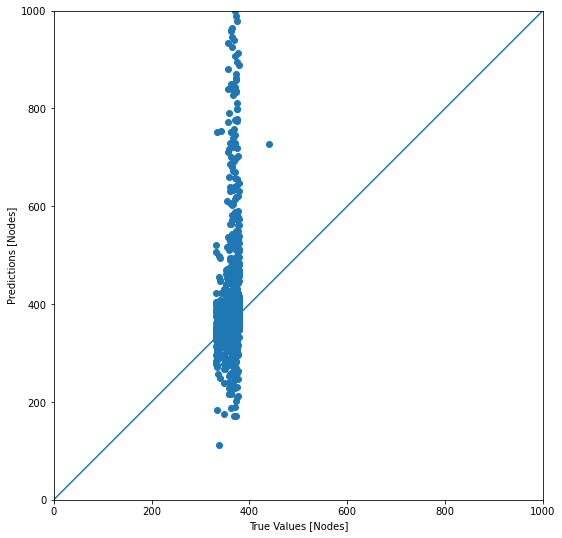

In [380]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

# Writing a flexible hyperparameter search model

In [381]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(optimizer='Adam',activation='relu'):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [382]:
model = flex_reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [383]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,batch_size=128,
  callbacks=[early_stop]
)

Epoch 1/1000
3/3 [==============================] - 0s 40ms/step - loss: 3391258.5000 - mae: 1179.4456 - mse: 3391258.5000 - val_loss: 11410129.0000 - val_mae: 2887.0181 - val_mse: 11410129.0000
Epoch 2/1000
3/3 [==============================] - 0s 7ms/step - loss: 3380366.0000 - mae: 1176.0178 - mse: 3380366.0000 - val_loss: 11367392.0000 - val_mae: 2880.6589 - val_mse: 11367392.0000
Epoch 3/1000
3/3 [==============================] - 0s 7ms/step - loss: 3364566.7500 - mae: 1170.9520 - mse: 3364566.7500 - val_loss: 11294052.0000 - val_mae: 2869.8042 - val_mse: 11294052.0000
Epoch 4/1000
3/3 [==============================] - 0s 7ms/step - loss: 3339278.5000 - mae: 1162.7089 - mse: 3339278.5000 - val_loss: 11174864.0000 - val_mae: 2852.2378 - val_mse: 11174864.0000
Epoch 5/1000
3/3 [==============================] - 0s 7ms/step - loss: 3300228.5000 - mae: 1150.1404 - mse: 3300228.5000 - val_loss: 10998668.0000 - val_mae: 2826.1714 - val_mse: 10998668.0000
Epoch 6/1000
3/3 [===========

Epoch 44/1000
3/3 [==============================] - 0s 7ms/step - loss: 127402.1250 - mae: 203.0492 - mse: 127402.1250 - val_loss: 303791.3125 - val_mae: 327.9254 - val_mse: 303791.3125
Epoch 45/1000
3/3 [==============================] - 0s 7ms/step - loss: 124926.9219 - mae: 201.6382 - mse: 124926.9219 - val_loss: 300112.4375 - val_mae: 325.7863 - val_mse: 300112.4375
Epoch 46/1000
3/3 [==============================] - 0s 7ms/step - loss: 123227.0781 - mae: 200.6786 - mse: 123227.0781 - val_loss: 296768.8125 - val_mae: 321.1635 - val_mse: 296768.8125
Epoch 47/1000
3/3 [==============================] - 0s 7ms/step - loss: 121003.1641 - mae: 199.5103 - mse: 121003.1641 - val_loss: 293811.4688 - val_mae: 317.2862 - val_mse: 293811.4688
Epoch 48/1000
3/3 [==============================] - 0s 7ms/step - loss: 119228.7344 - mae: 198.8106 - mse: 119228.7344 - val_loss: 290443.4062 - val_mae: 314.9817 - val_mse: 290443.4062
Epoch 49/1000
3/3 [==============================] - 0s 7ms/step 

Epoch 88/1000
3/3 [==============================] - 0s 7ms/step - loss: 71293.2734 - mae: 155.1802 - mse: 71293.2734 - val_loss: 212148.1250 - val_mae: 286.8028 - val_mse: 212148.1250
Epoch 89/1000
3/3 [==============================] - 0s 7ms/step - loss: 70402.5781 - mae: 152.4551 - mse: 70402.5781 - val_loss: 211742.8438 - val_mae: 280.4851 - val_mse: 211742.8438
Epoch 90/1000
3/3 [==============================] - 0s 7ms/step - loss: 69995.5625 - mae: 150.0268 - mse: 69995.5625 - val_loss: 211124.8438 - val_mae: 277.2520 - val_mse: 211124.8438
Epoch 91/1000
3/3 [==============================] - 0s 7ms/step - loss: 69044.4141 - mae: 149.2882 - mse: 69044.4141 - val_loss: 208319.2188 - val_mae: 277.9810 - val_mse: 208319.2188
Epoch 92/1000
3/3 [==============================] - 0s 7ms/step - loss: 68273.9219 - mae: 150.7371 - mse: 68273.9219 - val_loss: 206570.0625 - val_mae: 283.5145 - val_mse: 206570.0625
Epoch 93/1000
3/3 [==============================] - 0s 7ms/step - loss: 68

3/3 [==============================] - 0s 8ms/step - loss: 38659.4062 - mae: 94.7607 - mse: 38659.4062 - val_loss: 119648.2969 - val_mae: 220.6264 - val_mse: 119648.2969
Epoch 176/1000
3/3 [==============================] - 0s 7ms/step - loss: 38171.7812 - mae: 91.9050 - mse: 38171.7812 - val_loss: 116959.4766 - val_mae: 215.2522 - val_mse: 116959.4766
Epoch 177/1000
3/3 [==============================] - 0s 7ms/step - loss: 38413.8516 - mae: 91.8840 - mse: 38413.8516 - val_loss: 115892.1641 - val_mae: 214.2603 - val_mse: 115892.1641
Epoch 178/1000
3/3 [==============================] - 0s 7ms/step - loss: 38052.3359 - mae: 91.0500 - mse: 38052.3359 - val_loss: 115125.1406 - val_mae: 212.7660 - val_mse: 115125.1406
Epoch 179/1000
3/3 [==============================] - 0s 7ms/step - loss: 37945.5078 - mae: 90.3444 - mse: 37945.5078 - val_loss: 114947.5625 - val_mae: 214.2391 - val_mse: 114947.5625
Epoch 180/1000
3/3 [==============================] - 0s 7ms/step - loss: 37423.3125 - mae

Epoch 264/1000
3/3 [==============================] - 0s 7ms/step - loss: 29222.8242 - mae: 74.6075 - mse: 29222.8242 - val_loss: 83663.1250 - val_mae: 195.3240 - val_mse: 83663.1250
Epoch 265/1000
3/3 [==============================] - 0s 7ms/step - loss: 29270.6562 - mae: 74.5304 - mse: 29270.6562 - val_loss: 81815.5938 - val_mae: 191.6332 - val_mse: 81815.5938
Epoch 266/1000
3/3 [==============================] - 0s 7ms/step - loss: 29136.9727 - mae: 74.3638 - mse: 29136.9727 - val_loss: 81742.0156 - val_mae: 192.2598 - val_mse: 81742.0156
Epoch 267/1000
3/3 [==============================] - 0s 7ms/step - loss: 29143.8809 - mae: 74.5800 - mse: 29143.8809 - val_loss: 82035.7344 - val_mae: 193.8477 - val_mse: 82035.7344
Epoch 268/1000
3/3 [==============================] - 0s 7ms/step - loss: 29373.0742 - mae: 75.4253 - mse: 29373.0742 - val_loss: 83573.2578 - val_mae: 197.1084 - val_mse: 83573.2578
Epoch 269/1000
3/3 [==============================] - 0s 7ms/step - loss: 28886.3555 

In [384]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

37/37 - 0s - loss: 4101036534604496896.0000 - mae: 916664064.0000 - mse: 4101036534604496896.0000
Testing set Mean Abs Error: 916664064.00 Nodes


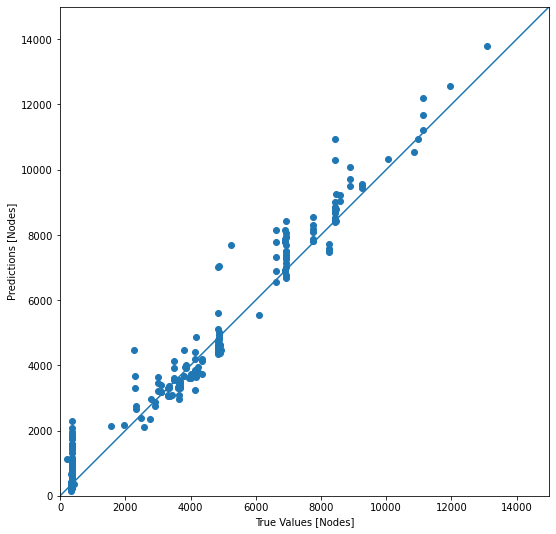

In [385]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [386]:
sample_test = np.array(normed_train_data.iloc[50]).reshape((1,15))
sample_test

array([[-0.57111212,  0.11323582, -0.7498037 , -0.99106631, -1.00824361,
        -0.98449153, -0.87315805, -0.79405838, -0.8727151 , -0.91331374,
        -0.90299511,  0.28743517, -1.1287649 , -1.00082585, -0.79424431]])

In [387]:
sample2 = np.array(normed_test_data.iloc[209]).reshape((1,15))
sample2

array([[ 3.71585759, -2.0843609 , -0.73970368,  1.75550089, -0.3086097 ,
        -0.02618238, -0.46764603, -0.58090743, -0.26318556,  0.48903913,
        -0.44792515,  2.21035182, -0.29370907, -0.00940473, -0.55827633]])

In [388]:
normed_test_data.shape, sample_test.shape, sample2.shape

((1179, 15), (1, 15), (1, 15))

In [389]:
model.predict(sample_test), train_labels.iloc[50]

(array([[346.58047]], dtype=float32), 340.0)

In [390]:
model.predict(sample2), test_labels.iloc[209]

(array([[339.26627]], dtype=float32), 376.0)

In [411]:
len(normed_test_data)

1179

In [437]:
from random import randint
l = []
for i in range(30):
    x = randint(0,1024)
    if x not in l:
        l.append(x)

resultdf = {}

for i in l:
    sample_test = np.array(normed_test_data.iloc[i]).reshape((1,test_dataset.shape[1]))
    resultdf[test_labels.iloc[i]] = model.predict(sample_test).flatten()
    
resultdf

{373.0: array([454.9573], dtype=float32),
 366.0: array([347.959], dtype=float32),
 333.0: array([376.78055], dtype=float32),
 375.0: array([402.68597], dtype=float32),
 3655.0: array([3474.6243], dtype=float32),
 378.0: array([409.11093], dtype=float32),
 367.0: array([380.92072], dtype=float32),
 374.0: array([392.70853], dtype=float32),
 352.0: array([357.19077], dtype=float32),
 4859.0: array([4800.014], dtype=float32),
 354.0: array([366.98544], dtype=float32),
 348.0: array([374.42197], dtype=float32),
 353.0: array([366.718], dtype=float32),
 350.0: array([354.68027], dtype=float32),
 346.0: array([349.6535], dtype=float32),
 6928.0: array([7394.32], dtype=float32),
 372.0: array([397.34824], dtype=float32),
 376.0: array([347.54037], dtype=float32),
 369.0: array([390.21335], dtype=float32),
 356.0: array([367.5914], dtype=float32),
 359.0: array([367.22464], dtype=float32),
 362.0: array([402.47534], dtype=float32)}

In [438]:
resultdf = pd.DataFrame.from_dict(resultdf,orient='index',columns=['Predicted Nodes'])
resultdf

,Predicted Nodes
373.0,454.957306
366.0,347.959015
333.0,376.780548
375.0,402.685974
3655.0,3474.624268
378.0,409.110931
367.0,380.920715
374.0,392.708527
352.0,357.190765
4859.0,4800.014160


In [439]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

accuracy = explained_variance_score(test_labels,test_predictions)
print(f'Explained Variance : {accuracy} (1 is best, lower scores are worse )')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

Explained Variance : 0.9818558460706386 (1 is best, lower scores are worse )
MAE: 121.37585683471576


In [441]:
from sklearn.metrics import max_error

my_err = max_error(test_labels,test_predictions)
print(f'Max error across dataset : {my_err} (maximum resudial error, should be low)')


Max error across dataset : 3119.0625 (maximum resudial error, should be low)


In [443]:
from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(test_labels, test_predictions)
# print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 317.8592672947607


In [446]:
from sklearn.metrics import r2_score

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

R^2 coefficient of determination: 0.9809607703558645 (1 is best, can be negative if output is reverse of input)


# End bookmark